In [1]:
import spot, buddy
from IPython.display import display
import WBA_utils
import to_weighted_twa
import time

/media/philipp/cc069263-05da-48d7-bc4c-5fa6918260464/git/wspot/code/spot/python/spot/__init__.py


In [2]:
def n_states(zgFile:str):
    with open(zgFile, "r") as f:
        c = 0
        f.readline()
        while("intval" in f.readline()):
            c += 1
    return c

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1.tchk.zg -l Init tchecker_examples/satellite_work_base_1.tchk
REACHABLE false
RUNNING_TIME_SECONDS 5.8178e-05
VISITED_STATES 4
Zone graph has 4 states
cpa abstraction has 21 states


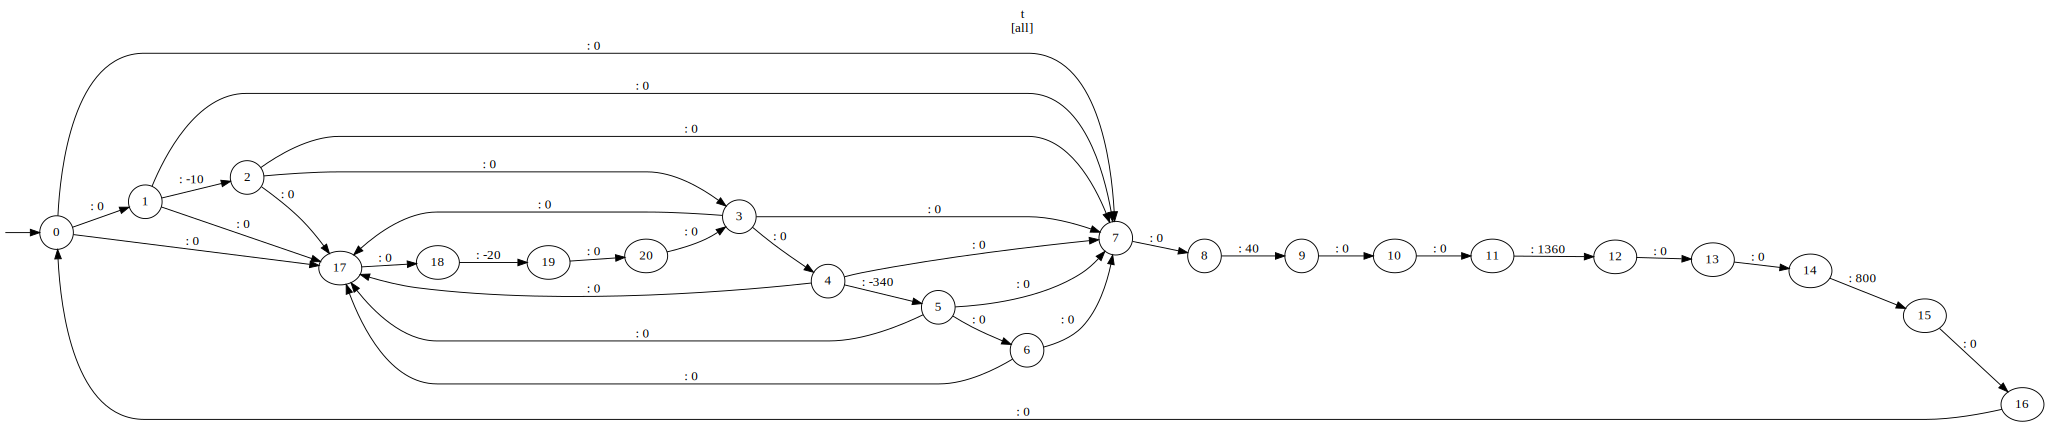

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_1.tchk.zg -l Init tchecker_examples/satellite_work_1.tchk
REACHABLE false
RUNNING_TIME_SECONDS 3.8622e-05
VISITED_STATES 6
Zone graph has 6 states
cpa abstraction has 25 states


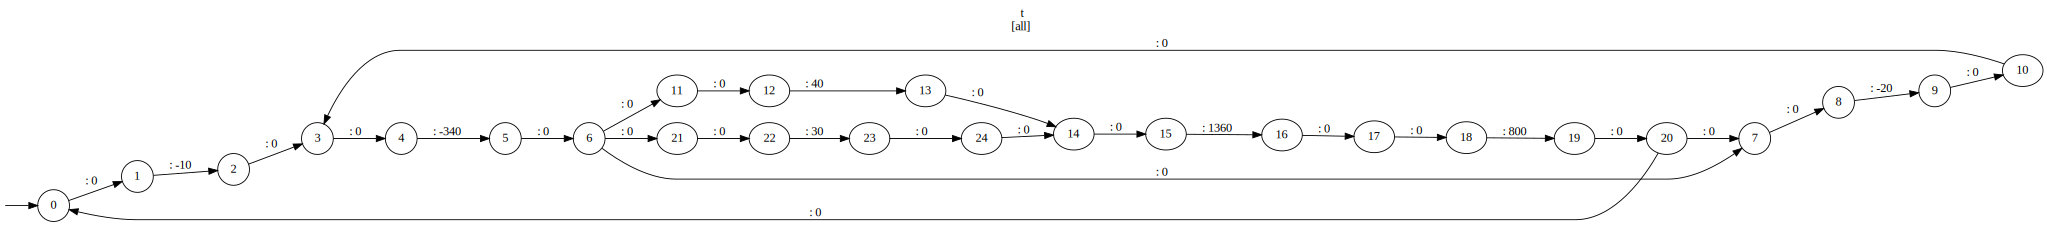

In [3]:
# Compairing the versions
# Number of work modules
i = 1
tchkFileUli = f"tchecker_examples/satellite_work_base_{i}.tchk"
tchkFilePSC = f"tchecker_examples/satellite_work_{i}.tchk"
tchkFiles = [tchkFileUli, tchkFilePSC]
wbas = []
for tchkFile in tchkFiles:
    to_weighted_twa.translate(tchkFile)
    print(f"Zone graph has {n_states(tchkFile+'.zg')} states")

    wba = spot.automaton(tchkFile + ".hoa")
    wbas.append(wba)
    print(f"cpa abstraction has {wba.num_states()} states")
    display(wba.show("tbrg"))

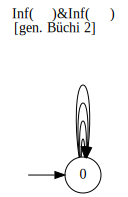

In [4]:
spec = spot.translate("GF(dT) && GF(tr1)", dict = wba.get_dict())
display(spec.show("tbrg"))

WBA with spec has 21 states


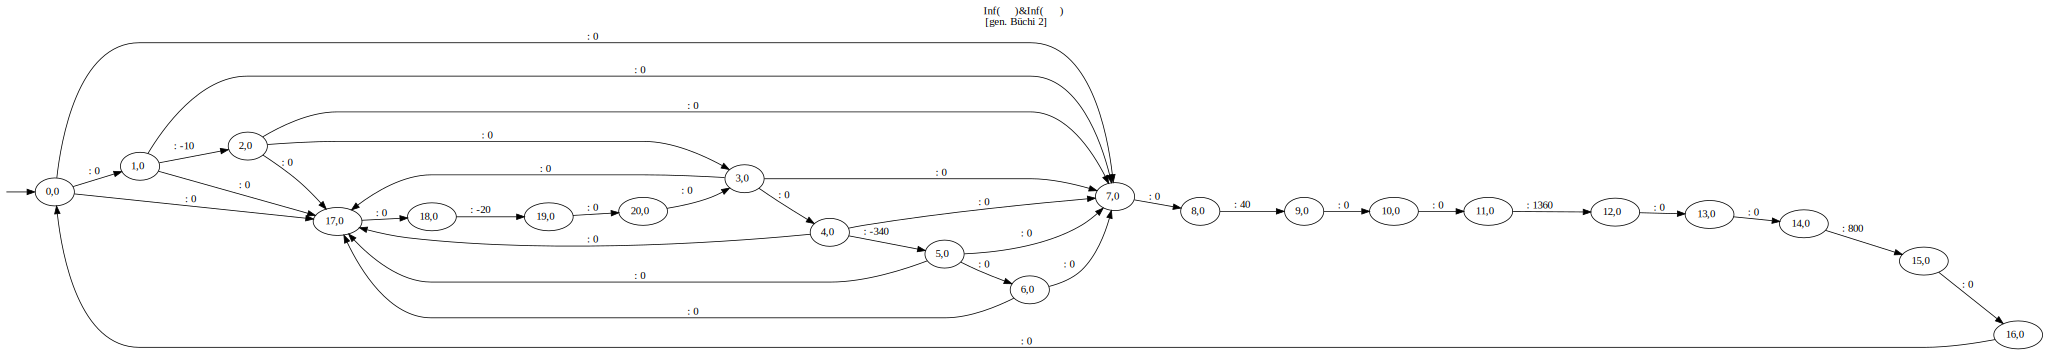

Original automaton


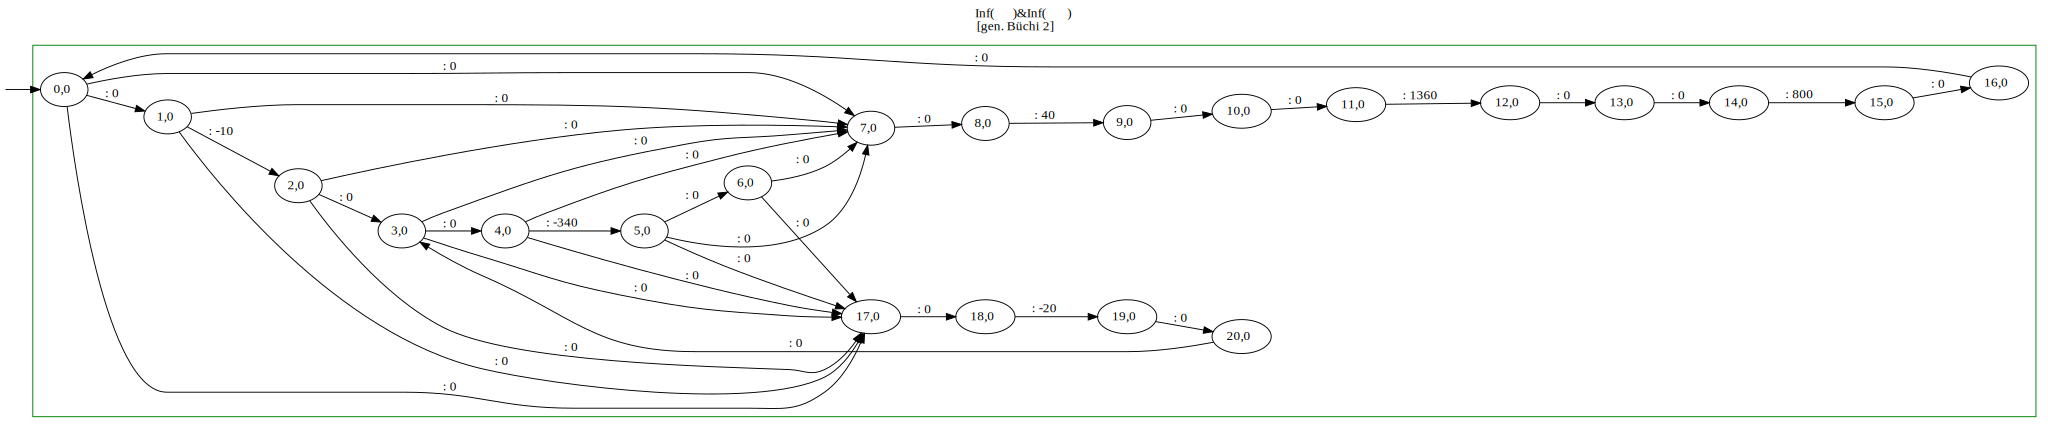

Prefix energy per state
array('q', [400, 400, 400, 400, 390, 400, 400, 390, 400, 380, 390, 400, 380, 50, 400, 50, 400, 400, 400, 400, 400])
Current optimal predescessor
array('Q', [34, 1, 2, 3, 4, 7, 8, 9, 12, 13, 14, 17, 18, 19, 22, 24, 27, 30, 31, 32, 33])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


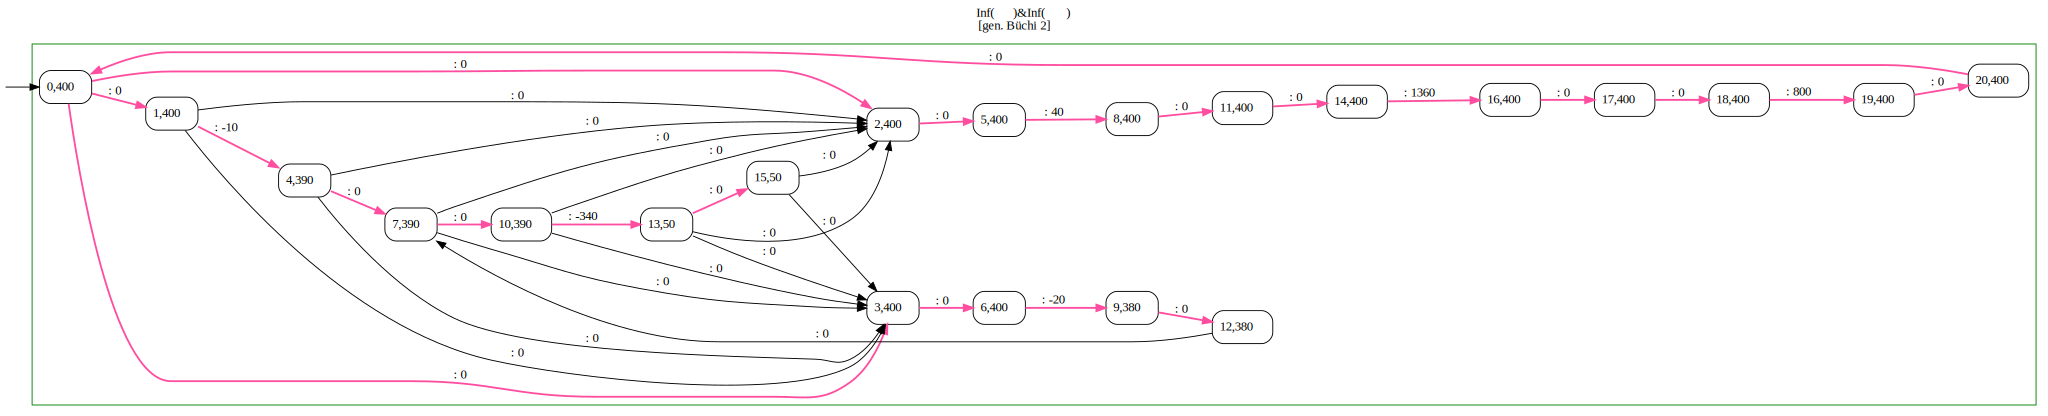

Checking SCC 0
Degeneralized SCC has: 42 states, 68 edges and 1 back-edges.
Current SCC with: 42 states and 1 back-edges
{0: 0, 1: 1, 4: 2, 7: 3, 10: 4, 13: 5, 15: 6, 2: 7, 5: 8, 8: 9, 11: 10, 14: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 3: 17, 6: 18, 9: 19, 12: 20}


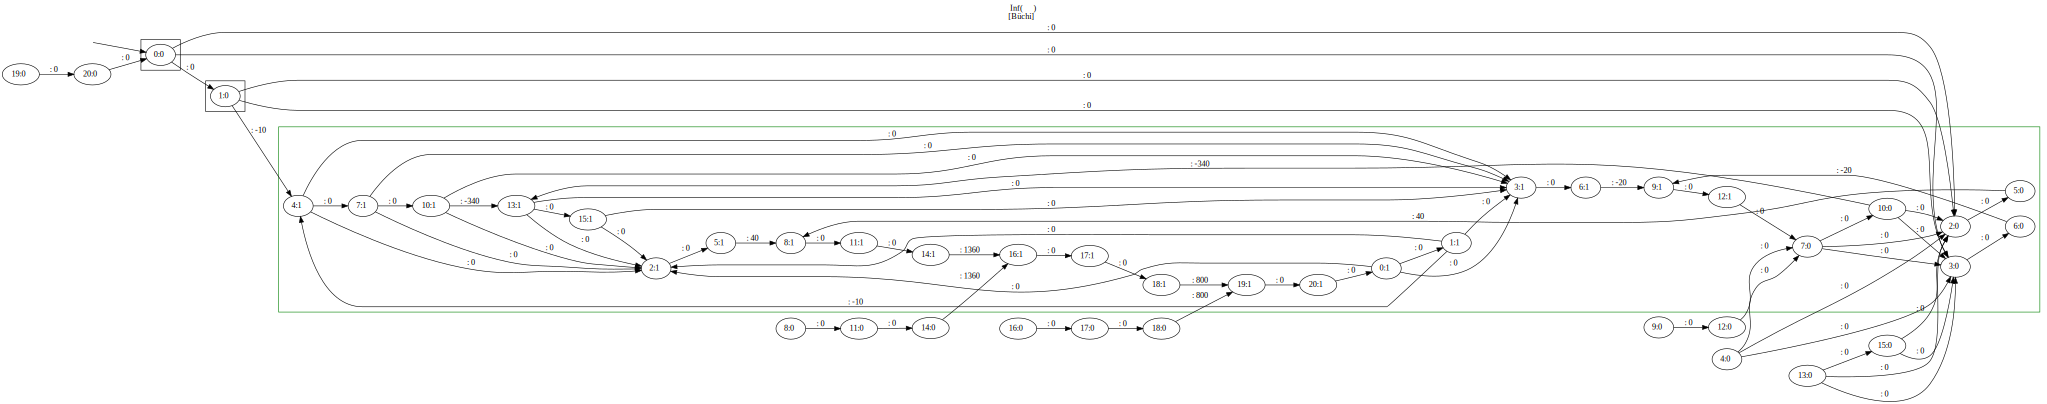

Analysing backedge 12:1 -> 7:0.
We start with 390 energy in state 7:0.
array('q', [-1, -1, -1, 390, 390, -1, -1, 390, 390, -1, -1, -1, -1, -1, -1, -1, -1, 390, 390, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380]) array('Q', [0, 0, 0, 0, 19, 0, 0, 21, 41, 0, 0, 0, 0, 0, 0, 0, 0, 23, 61, 0, 0, 60, 2, 8, 14, 20, 25, 32, 4, 42, 43, 46, 48, 50, 52, 54, 56, 58, 6, 62, 64, 66])
We restart with 380 energy in state 7:0.
array('q', [-1, -1, -1, 380, 380, -1, -1, 380, 380, -1, -1, -1, -1, -1, -1, -1, -1, 380, 380, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380]) array('Q', [0, 0, 0, 0, 19, 0, 0, 21, 41, 0, 0, 0, 0, 0, 0, 0, 0, 23, 61, 0, 0, 60, 2, 8, 14, 20, 26, 32, 4, 42, 43, 46, 48, 50, 52, 54, 56, 58, 6, 62, 64, 66])
We found a non-negative loop using edge 12:1 -> 7:0 in the second iteration.
WBA with spec has 25 states


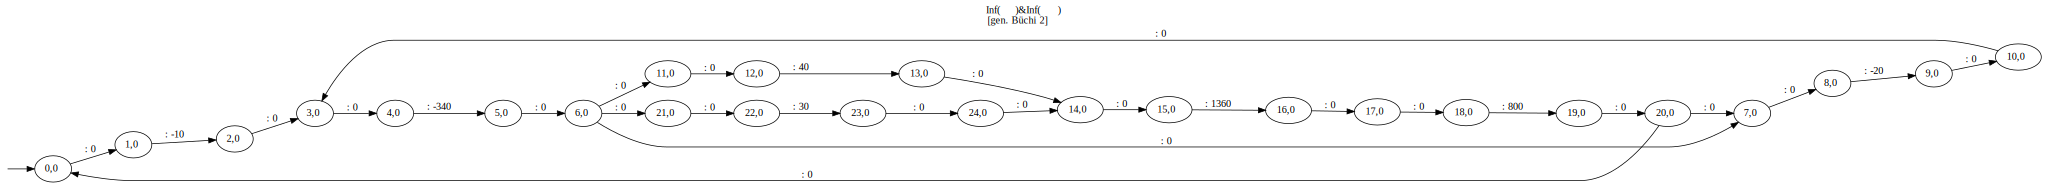

Original automaton


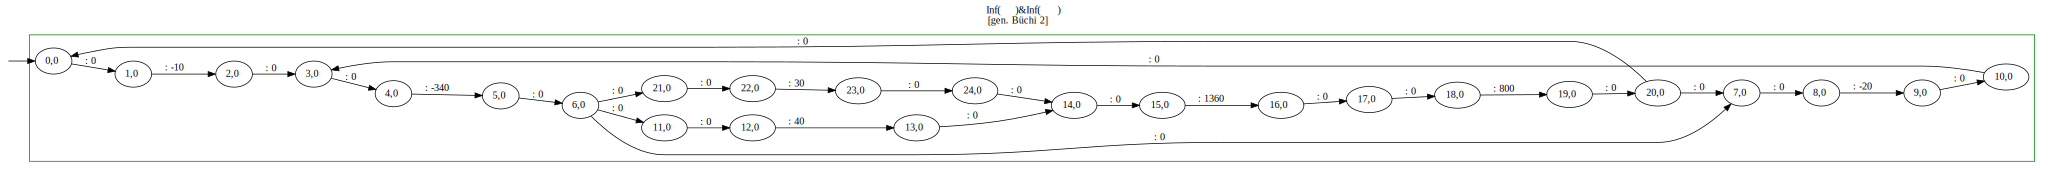

Prefix energy per state
array('q', [400, 400, 390, 390, 390, 50, 50, 400, 50, 50, 400, 50, 50, 380, 90, 80, 380, 90, 80, 90, 400, 400, 400, 400, 400])
Current optimal predescessor
array('Q', [27, 1, 2, 3, 4, 5, 6, 28, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26])
State names are: "state number, max energy"
Optimal predescessor is highlighted in pink


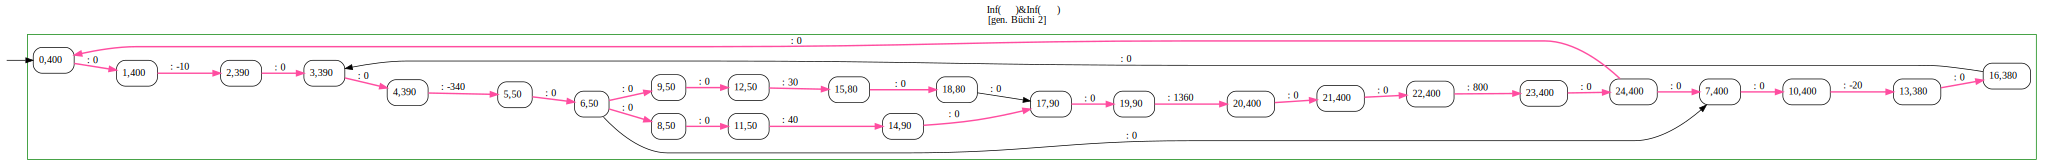

Checking SCC 0
Degeneralized SCC has: 50 states, 56 edges and 2 back-edges.
Current SCC with: 50 states and 2 back-edges
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 10: 8, 13: 9, 16: 10, 8: 11, 11: 12, 14: 13, 17: 14, 19: 15, 20: 16, 21: 17, 22: 18, 23: 19, 24: 20, 9: 21, 12: 22, 15: 23, 18: 24}


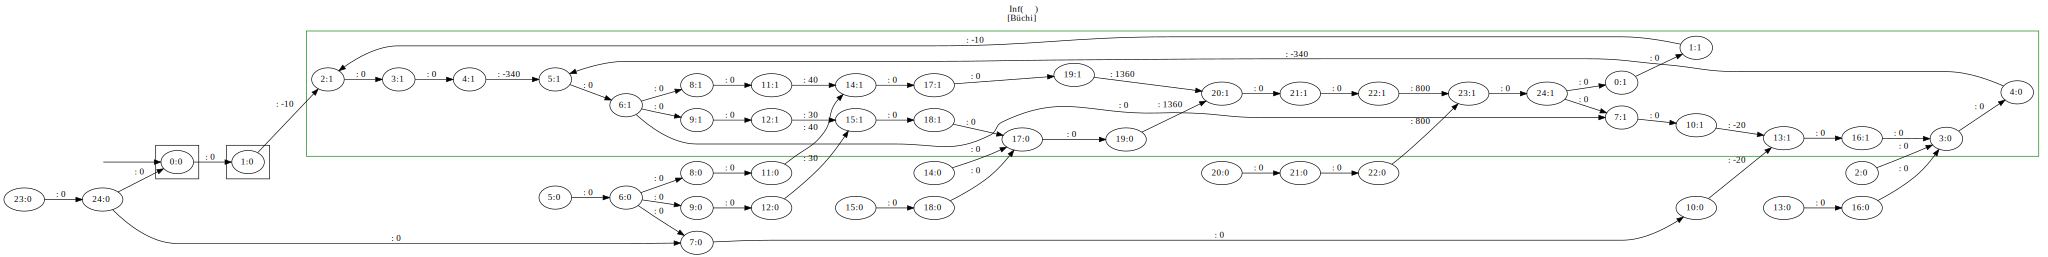

Analysing backedge 16:1 -> 3:0.
We start with 390 energy in state 3:0.
array('q', [-1, -1, -1, 390, 390, -1, -1, -1, -1, -1, -1, -1, -1, -1, 80, 80, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 380, 380, 50, 50, 90, 90, 90, 400, 400, 400, 400, 400, 50, 50, 80, 80]) array('Q', [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 2, 4, 6, 8, 9, 12, 48, 20, 22, 24, 16, 28, 30, 32, 34, 36, 38, 40, 42, 44, 18, 50, 52, 54])
We restart with 380 energy in state 3:0.
array('q', [-1, -1, -1, 380, 380, -1, -1, -1, -1, -1, -1, -1, -1, -1, 80, 80, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 380, 380, 50, 50, 90, 90, 90, 400, 400, 400, 400, 400, 50, 50, 80, 80]) array('Q', [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 2, 4, 6, 8, 10, 12, 48, 20, 22, 24, 16, 28, 30, 32, 34, 36, 38, 40, 42, 44, 18, 50, 52, 54])
We found a non-negative loop using edge 16:1 -> 3:0 in the 

In [5]:
tot_wbas = []
for wba in wbas:
    tot_wba = spot.product(wba, spec)
    tot_wbas.append(tot_wba)
    print(f"WBA with spec has {tot_wba.num_states()} states")
    display(tot_wba.show("tbrg"))
    # Solve
    WBA_utils.BuechiEnergy(tot_wba, 0, 400, 350, True) 

In [6]:
#Benchmarks
all_res = [[], []]

spec_ltl = "GF(dT)"
for i in range(1, 11):
    tchkFiles = [f"tchecker_examples/satellite_work_base_{i}.tchk", f"tchecker_examples/satellite_work_{i}.tchk"]
    spec_ltl += f" && GF(tr{i})"
    for ares, tchkFile in zip(all_res, tchkFiles):
        this_res = {}
        t = time.time()
        to_weighted_twa.translate(tchkFile)
        this_res["tchk2cpatime"] = time.time()-t
        this_res["zgStates"] = n_states(tchkFile+".zg")
    
        wba = spot.automaton(tchkFile + ".hoa")
        this_res["cpastates"] = wba.num_states()
        
        t = time.time()
        spec = spot.translate(spec_ltl, dict = wba.get_dict())
        this_res["spectranstime"] = time.time()-t
        
        t = time.time()
        tot_wba = spot.product(wba, spec)
        this_res["prodtime"] = time.time()-t
        this_res["prodstates"] = tot_wba.num_states()
        
        t = time.time()
        WBA_utils.BuechiEnergy(tot_wba, 0, 400, 350, False)
        this_res["solvetime"] = time.time()-t
        
        ares.append(this_res)

./tchecker/build/src/tck-reach -a reach -C tchecker_examples/satellite_work_base_1.tchk.zg -l Init tchecker_examples/satellite_work_base_1.tchk
REACHABLE false
RUNNING_TIME_SECONDS 5.3219e-05
VISITED_STATES 4
Checking SCC 0
Degeneralized SCC has: 42 states, 68 edges and 1 back-edges.
Analysing backedge 12:1 -> 7:0.
We start with 390 energy in state 7:0.
array('q', [-1, -1, -1, 390, 390, -1, -1, 390, 390, -1, -1, -1, -1, -1, -1, -1, -1, 390, 390, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380]) array('Q', [0, 0, 0, 0, 19, 0, 0, 21, 41, 0, 0, 0, 0, 0, 0, 0, 0, 23, 61, 0, 0, 60, 2, 8, 14, 20, 25, 32, 4, 42, 43, 46, 48, 50, 52, 54, 56, 58, 6, 62, 64, 66])
We restart with 380 energy in state 7:0.
array('q', [-1, -1, -1, 380, 380, -1, -1, 380, 380, -1, -1, -1, -1, -1, -1, -1, -1, 380, 380, -1, -1, 400, 400, 390, 390, 390, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380]) array('Q', [0, 0, 0, 0, 19, 0,

Checking SCC 0
Degeneralized SCC has: 284 states, 320 edges and 2 back-edges.
Analysing backedge 62:3 -> 9:0.
We start with 370 energy in state 9:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, 370, 370, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 140, 140, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 50, 50, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 50, 50, 90, 90, 90, 130, 130, 130, 170, 170, 170, 400, 400, 400, 400, 400, 50, 50, 80, 80, 80, 110, 110, 110, 140, 140, 50, 50, 80, 80, 80, 110, 110, 50, 50, 80, 80, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 50, 50, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 50, 50, 90, 90, 90, 130, 130, 130, 170, 170, 170,

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, 320, 320, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 400, 400, 390,

Checking SCC 0
Degeneralized SCC has: 546 states, 1224 edges and 1 back-edges.
Analysing backedge 82:5 -> 77:0.
We start with 350 energy in state 77:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, 350, 350, -1, -1, -1, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 320, 300, 300, 400, 

REACHABLE false
RUNNING_TIME_SECONDS 0.00064149
VISITED_STATES 74
Checking SCC 0
Degeneralized SCC has: 846 states, 936 edges and 2 back-edges.
Analysing backedge 132:5 -> 15:0.
We start with 350 energy in state 15:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 50, 50, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 320, 300, 300, 400, 400, 380, 380, 380, 360,

Checking SCC 0
Degeneralized SCC has: 812 states, 1883 edges and 1 back-edges.
Analysing backedge 107:6 -> 102:0.
We start with 340 energy in state 102:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, 340, 340, -1, -1, -1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 

We restart with 280 energy in state 102:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, 280, 280, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 380, 400, 400, 380, 380, 380, 360, 360, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 32

REACHABLE false
RUNNING_TIME_SECONDS 0.00354339
VISITED_STATES 140
Checking SCC 0
Degeneralized SCC has: 1295 states, 1421 edges and 2 back-edges.
Analysing backedge 176:6 -> 18:0.
We start with 340 energy in state 18:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 340, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 230, 230, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 290, 290, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 50, 50, 400, 400, 380, 380, 380, 360, 360, 360, 340, 340, 340, 320, 320, 320, 300, 300, 300, 280, 280, 400, 400, 380, 380, 380, 360, 360, 360, 3

Checking SCC 0
Degeneralized SCC has: 1152 states, 2744 edges and 1 back-edges.
Analysing backedge 135:7 -> 130:0.
We start with 330 energy in state 130:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, 330, 330, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 330, 330, 330, 50, 50, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 

Checking SCC 0
Degeneralized SCC has: 1880 states, 2048 edges and 2 back-edges.
Analysing backedge 226:7 -> 21:0.
We start with 330 energy in state 21:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 260, 260, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 260, 260, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 260, 260, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 260, 260, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370,

Checking SCC 0
Degeneralized SCC has: 1575 states, 3834 edges and 1 back-edges.
Analysing backedge 166:8 -> 161:0.
We start with 320 energy in state 161:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, 320, 320, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 330, 330, 33

Checking SCC 0
Degeneralized SCC has: 2619 states, 2835 edges and 2 back-edges.
Analysing backedge 282:8 -> 24:0.
We start with 320 energy in state 24:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 290, 290, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 240, 240, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 240, 240, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 290, 290, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

Checking SCC 0
Degeneralized SCC has: 2090 states, 5180 edges and 1 back-edges.
Analysing backedge 200:9 -> 195:0.
We start with 310 energy in state 195:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, 310, 310, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, 220, 220, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, 390, 390, 390, 380, 380, 380, 370, 370, 370, 360, 360, 360, 350, 350, 350, 340, 340, 340, 330, 330, 330, 320, 320, 320, 

Checking SCC 0
Degeneralized SCC has: 3530 states, 3800 edges and 2 back-edges.
Analysing backedge 344:9 -> 27:0.
We start with 310 energy in state 27:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 220, 220, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

Checking SCC 0
Degeneralized SCC has: 2706 states, 6809 edges and 1 back-edges.
Analysing backedge 237:10 -> 232:0.
We start with 300 energy in state 232:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, 300, 300, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, 200, 200, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

Checking SCC 0
Degeneralized SCC has: 4631 states, 4961 edges and 2 back-edges.
Analysing backedge 412:10 -> 30:0.
We start with 300 energy in state 30:0.
array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 300, 300, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 400, -1, -1, -1, -1, -1, 

array('q', [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 200, 200, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 350, -1, -1, -1, -1, -1, 

In [8]:
for i in range(10):
    print(f"N modules: {i+1}")
    print("Uli")
    print(all_res[0][i])
    print("PSC")
    print(all_res[1][i])

N modules: 1
Uli
{'tchk2cpatime': 0.009583234786987305, 'zgStates': 4, 'spectranstime': 0.0005788803100585938, 'prodtime': 3.314018249511719e-05, 'prodstates': 21, 'solvetime': 0.003310680389404297}
PSC
{'tchk2cpatime': 0.014212608337402344, 'zgStates': 6, 'spectranstime': 0.0012819766998291016, 'prodtime': 4.9114227294921875e-05, 'prodstates': 25, 'solvetime': 0.005323886871337891}
N modules: 2
Uli
{'tchk2cpatime': 0.012618303298950195, 'zgStates': 6, 'spectranstime': 0.003225088119506836, 'prodtime': 0.000110626220703125, 'prodstates': 34, 'solvetime': 0.00793766975402832}
PSC
{'tchk2cpatime': 0.012499570846557617, 'zgStates': 12, 'spectranstime': 0.001161336898803711, 'prodtime': 6.818771362304688e-05, 'prodstates': 45, 'solvetime': 0.010217905044555664}
N modules: 3
Uli
{'tchk2cpatime': 0.01642155647277832, 'zgStates': 8, 'spectranstime': 0.003712177276611328, 'prodtime': 0.00010704994201660156, 'prodstates': 50, 'solvetime': 0.010230064392089844}
PSC
{'tchk2cpatime': 0.02220320701